In [19]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [20]:
# archive folder contains the train.csv & test.csv files

dataset = pd.read_csv('./archive/train.csv')

In [21]:
dataset.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [22]:
# Replace missing values with 0
# Handle uncertainty with U-Ones and U-Zeros approaches

# U-Zeros
dataset['Cardiomegaly'].fillna(0, inplace=True)
dataset['Cardiomegaly'].replace(-1, 0, inplace=True)

dataset['Consolidation'].fillna(0, inplace=True)
dataset['Consolidation'].replace(-1, 0, inplace=True)

dataset['Pleural Effusion'].fillna(0, inplace=True)
dataset['Pleural Effusion'].replace(-1, 0, inplace=True)


# U-Ones
dataset['Atelectasis'].fillna(0, inplace=True)
dataset['Atelectasis'].replace(-1, 1, inplace=True)

dataset['Edema'].fillna(0, inplace=True)
dataset['Edema'].replace(-1, 1, inplace=True)

In [23]:
dataset.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,0.0,1.0,NaN,1.0,0.0,NaN,1.0,NaN,0.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,0.0,1.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,0.0,1.0,NaN,0.0,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,0.0,NaN,NaN,1.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN


In [24]:
pathologies = ['Cardiomegaly', 'Edema', 'Atelectasis', 'Pleural Effusion', 'Consolidation']

In [25]:
labels_df = dataset[pathologies].copy()

In [26]:
labels_df

,Cardiomegaly,Edema,Atelectasis,Pleural Effusion,Consolidation
0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
223409,0.0,0.0,1.0,1.0,0.0
223410,0.0,0.0,1.0,0.0,0.0
223411,0.0,1.0,0.0,0.0,0.0
223412,1.0,0.0,1.0,0.0,0.0


In [27]:
correlation = labels_df.corr()

In [28]:
from matplotlib.pyplot import figure

<Figure size 4176x4032 with 0 Axes>

<Figure size 4176x4032 with 0 Axes>

In [29]:
correlation

,Cardiomegaly,Edema,Atelectasis,Pleural Effusion,Consolidation
Cardiomegaly,1.000000,0.176587,-0.001467,0.040062,-0.019365
Edema,0.176587,1.000000,0.003103,0.107006,-0.014502
Atelectasis,-0.001467,0.003103,1.000000,0.111960,-0.005063
Pleural Effusion,0.040062,0.107006,0.111960,1.000000,0.062890
Consolidation,-0.019365,-0.014502,-0.005063,0.062890,1.000000


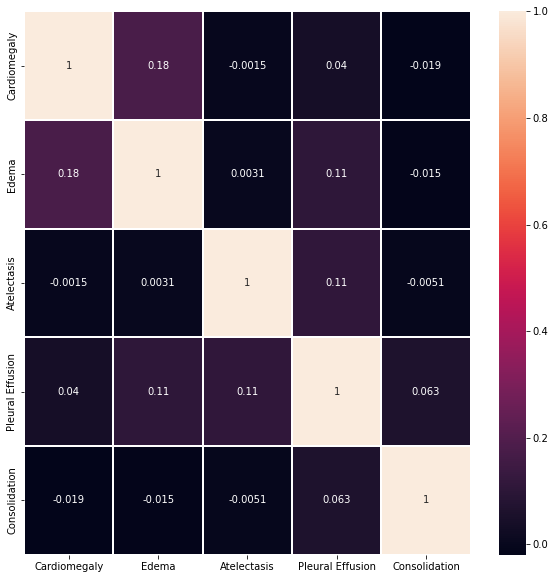

In [30]:
fig, ax = plt.subplots(figsize=(10,10))
sn.heatmap(correlation, annot=True, linewidths=.3, ax=ax)

plt.savefig('cheXpert-correlation.png', dpi=400)